In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt



In D:\Users\User1\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Users\User1\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Users\User1\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In D:\Users\User1\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Users\User1\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

### Loading Data

In [3]:
prices_houses = pd.read_csv('prices_houses_Amsterdam.csv')
prices_houses.drop(columns='Unnamed: 0', axis=0, inplace=True)

## Data at first sight

In [4]:
prices_houses.head()

,Address,Zip,Price,Area,Room,Lon,Lat
0,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


In [5]:
prices_houses.tail()

,Address,Zip,Price,Area,Room,Lon,Lat
919,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
920,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
921,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
922,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268
923,"S. F. van Ossstraat 334, Amsterdam",1068 JS,300000.0,79,4,4.810678,52.355493


In [6]:
prices_houses.sample(5)

,Address,Zip,Price,Area,Room,Lon,Lat
636,"Kloekhorststraat 215, Amsterdam",1104 MN,265000.0,72,3,4.968400,52.317292
416,"Boeninlaan 81, Amsterdam",1102 TH,230000.0,60,2,4.942778,52.320576
754,"Dulcie Septemberpad 2, Amsterdam",1093 NK,800000.0,130,5,4.932943,52.358329
875,"Burgemeester Cramergracht 91, Amsterdam",1064 AH,350000.0,75,3,4.832782,52.373345
104,"Groenhoven 453, Amsterdam",1103 LN,225000.0,52,2,4.976804,52.325544


### Data Inspection

In [7]:
prices_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Address  924 non-null    object 
 1   Zip      924 non-null    object 
 2   Price    920 non-null    float64
 3   Area     924 non-null    int64  
 4   Room     924 non-null    int64  
 5   Lon      924 non-null    float64
 6   Lat      924 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 50.7+ KB


In [8]:
prices_houses.describe()

,Price,Area,Room,Lon,Lat
count,9.200000e+02,924.000000,924.000000,924.000000,924.000000
mean,6.220654e+05,95.952381,3.571429,4.888605,52.363326
std,5.389942e+05,57.447436,1.592332,0.053140,0.024028
min,1.750000e+05,21.000000,1.000000,4.644819,52.291519
25%,3.500000e+05,60.750000,3.000000,4.855834,52.352077
50%,4.670000e+05,83.000000,3.000000,4.886818,52.364631
75%,7.000000e+05,113.000000,4.000000,4.922337,52.377598
max,5.950000e+06,623.000000,14.000000,5.029122,52.423805


In [9]:
prices_houses.shape

(924, 7)

In [10]:
prices_houses.dtypes

Address     object
Zip         object
Price      float64
Area         int64
Room         int64
Lon        float64
Lat        float64
dtype: object

### Checking Duplicates


In [11]:
prices_houses.loc[prices_houses.duplicated()]

,Address,Zip,Price,Area,Room,Lon,Lat
909,"Quashibastraat, Amsterdam",1087 VS,348738.0,79,4,5.016555,52.350513


In [12]:
prices_houses.drop_duplicates(inplace=True)

In [13]:
prices_houses.loc[prices_houses.duplicated()]

,Address,Zip,Price,Area,Room,Lon,Lat


### Checking Null values

In [14]:
prices_houses.isnull().sum()
# There are no NULL values in the dataset

Address    0
Zip        0
Price      4
Area       0
Room       0
Lon        0
Lat        0
dtype: int64

### Fixing invalid values

### Additional preperation

In [15]:
#create list for categorical variables
categorical_features= list(prices_houses.select_dtypes(include=['object']).keys())
prices_houses[categorical_features].head()

,Address,Zip
0,"Blasiusstraat 8 2, Amsterdam",1091 CR
1,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL
2,"Zaaiersweg 11 A, Amsterdam",1097 SM
3,"Tenerifestraat 40, Amsterdam",1060 TH
4,"Winterjanpad 21, Amsterdam",1036 KN


In [16]:
prices_houses_without_categorical_features = prices_houses.drop(columns=categorical_features, axis=1)
prices_houses_without_categorical_features

,Price,Area,Room,Lon,Lat
0,685000.0,64,3,4.907736,52.356157
1,475000.0,60,3,4.850476,52.348586
2,850000.0,109,4,4.944774,52.343782
3,580000.0,128,6,4.789928,52.343712
4,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...
919,750000.0,117,1,4.927757,52.354173
920,350000.0,72,3,4.890612,52.414587
921,350000.0,51,3,4.856935,52.363256
922,599000.0,113,4,4.965731,52.375268


### Vizualizations

#### Line plots

In [17]:
prices_houses

,Address,Zip,Price,Area,Room,Lon,Lat
0,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...
919,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
920,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
921,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
922,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268


In [ ]:
def minmax_norm(df_input):
    return (df_input - df_input.min()) / ( df_input.max() - df_input.min())

prices_houses_log = np.log(prices_houses_without_categorical_features['Price'])
prices_houses_log_df = pd.DataFrame(prices_houses_log)
prices_houses.insert(7, 'lg.price', prices_houses_log_df['Price'])

In [ ]:
prices_houses

In [ ]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

fig.suptitle('Title')

sns.lineplot(ax=axes[0, 0], data=prices_houses, x='Price', y='Room')
sns.lineplot(ax=axes[0, 1], data=prices_houses, x='Price', y='Area')
sns.lineplot(ax=axes[0, 2], data=prices_houses, x='Price', y='Lon')
sns.lineplot(ax=axes[1, 0], data=prices_houses, x='Price', y='Lat')
sns.lineplot(ax=axes[1, 1], data=prices_houses, x='Room', y='Area')
sns.lineplot(ax=axes[1, 2], data=prices_houses, x='Room', y='Lon')
sns.lineplot(ax=axes[2, 0], data=prices_houses, x='Room', y='Lat')
sns.lineplot(ax=axes[2, 1], data=prices_houses, x='Area', y='Lon')
sns.lineplot(ax=axes[2, 2], data=prices_houses, x='Area', y='Lat')

In [ ]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

fig.suptitle('Title')

sns.lineplot(ax=axes[0, 0], data=prices_houses, x='lg.price', y='Room')
sns.lineplot(ax=axes[0, 1], data=prices_houses, x='lg.price', y='Area')
sns.lineplot(ax=axes[0, 2], data=prices_houses, x='lg.price', y='Lon')
sns.lineplot(ax=axes[1, 0], data=prices_houses, x='lg.price', y='Lat')
sns.lineplot(ax=axes[1, 1], data=prices_houses, x='Room', y='Area')
sns.lineplot(ax=axes[1, 2], data=prices_houses, x='Room', y='Lon')
sns.lineplot(ax=axes[2, 0], data=prices_houses, x='Room', y='Lat')
sns.lineplot(ax=axes[2, 1], data=prices_houses, x='Area', y='Lon')
sns.lineplot(ax=axes[2, 2], data=prices_houses, x='Area', y='Lat')

In [ ]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

fig.suptitle('Title')

sns.scatterplot(ax=axes[0, 0], data=prices_houses, x='Price', y='Room')
sns.scatterplot(ax=axes[0, 1], data=prices_houses, x='Price', y='Area')
sns.scatterplot(ax=axes[0, 2], data=prices_houses, x='Price', y='Lon')
sns.scatterplot(ax=axes[1, 0], data=prices_houses, x='Price', y='Lat')
sns.scatterplot(ax=axes[1, 1], data=prices_houses, x='Room', y='Area')
sns.scatterplot(ax=axes[1, 2], data=prices_houses, x='Room', y='Lon')
sns.scatterplot(ax=axes[2, 0], data=prices_houses, x='Room', y='Lat')
sns.scatterplot(ax=axes[2, 1], data=prices_houses, x='Area', y='Lon')
sns.scatterplot(ax=axes[2, 2], data=prices_houses, x='Area', y='Lat')

In [ ]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

fig.suptitle('Title')

sns.scatterplot(ax=axes[0, 0], data=prices_houses, x='lg.price', y='Room')
sns.scatterplot(ax=axes[0, 1], data=prices_houses, x='lg.price', y='Area')
sns.scatterplot(ax=axes[0, 2], data=prices_houses, x='lg.price', y='Lon')
sns.scatterplot(ax=axes[1, 0], data=prices_houses, x='lg.price', y='Lat')
sns.scatterplot(ax=axes[1, 1], data=prices_houses, x='Room', y='Area')
sns.scatterplot(ax=axes[1, 2], data=prices_houses, x='Room', y='Lon')
sns.scatterplot(ax=axes[2, 0], data=prices_houses, x='Room', y='Lat')
sns.scatterplot(ax=axes[2, 1], data=prices_houses, x='Area', y='Lon')
sns.scatterplot(ax=axes[2, 2], data=prices_houses, x='Area', y='Lat')

In [ ]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

fig.suptitle('Title')

sns.regplot(ax=axes[0, 0], data=prices_houses, x='lg.price', y='Room')
sns.regplot(ax=axes[0, 1], data=prices_houses, x='lg.price', y='Area')
sns.regplot(ax=axes[0, 2], data=prices_houses, x='lg.price', y='Lon')
sns.regplot(ax=axes[1, 0], data=prices_houses, x='lg.price', y='Lat')
sns.regplot(ax=axes[1, 1], data=prices_houses, x='Room', y='Area')
sns.regplot(ax=axes[1, 2], data=prices_houses, x='Room', y='Lon')
sns.regplot(ax=axes[2, 0], data=prices_houses, x='Room', y='Lat')
sns.regplot(ax=axes[2, 1], data=prices_houses, x='Area', y='Lon')
sns.regplot(ax=axes[2, 2], data=prices_houses, x='Area', y='Lat')

In [ ]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

fig.suptitle('Title')

sns.barplot(ax=axes[0, 0], data=prices_houses, x='lg.price', y='Room')
sns.barplot(ax=axes[0, 1], data=prices_houses, x='lg.price', y='Area')
sns.barplot(ax=axes[0, 2], data=prices_houses, x='lg.price', y='Lon')
sns.barplot(ax=axes[1, 0], data=prices_houses, x='lg.price', y='Lat')
sns.barplot(ax=axes[1, 1], data=prices_houses, x='Room', y='Area')
sns.barplot(ax=axes[1, 2], data=prices_houses, x='Room', y='Lon')
sns.barplot(ax=axes[2, 0], data=prices_houses, x='Room', y='Lat')
sns.barplot(ax=axes[2, 1], data=prices_houses, x='Area', y='Lon')
sns.barplot(ax=axes[2, 2], data=prices_houses, x='Area', y='Lat')

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(prices_houses_without_categorical_features.corr(), annot = True)

### Standartization

In [29]:
print('The mean value of each column:', prices_houses_without_categorical_features.mean())
print('The std value of each column:', prices_houses_without_categorical_features.var())


The mean value of each column: Price    622362.837867
Area         95.970748
Room          3.570964
Lon           4.888467
Lat          52.363340
dtype: float64
The std value of each column: Price    2.907497e+11
Area     3.303475e+03
Room     2.538071e+00
Lon      2.809162e-03
Lat      5.778065e-04
dtype: float64


### The first way

In [30]:
def standartization(input_data):
    return input_data.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

prices_houses_standarted = standartization(prices_houses_without_categorical_features)
prices_houses_standarted

,Price,Area,Room,Lon,Lat
0,0.116164,-0.556246,-0.358391,0.363562,-0.298817
1,-0.273293,-0.625841,-0.358391,-0.716784,-0.613782
2,0.422166,0.226691,0.269303,1.062372,-0.813635
3,-0.078564,0.557264,1.524692,-1.859166,-0.816548
4,0.181074,0.731250,0.896997,0.264829,1.963513
...,...,...,...,...,...
919,0.236710,0.365880,-1.613779,0.741306,-0.381354
920,-0.505113,-0.417058,-0.358391,0.040477,2.131957
921,-0.505113,-0.782428,-0.358391,-0.594920,-0.003488
922,-0.043328,0.296285,0.269303,1.457776,0.496229


### The second way

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(prices_houses_without_categorical_features)

print(scaler.mean_)
print(scaler.var_)

[6.22362838e+05 9.59707476e+01 3.57096425e+00 4.88846666e+00
 5.23633398e+01]
[2.90433340e+11 3.29989622e+03 2.53532161e+00 2.80611843e-03
 5.77180473e-04]


In [32]:
data = scaler.transform(prices_houses_without_categorical_features)
scaled_data = pd.DataFrame(data, columns =['Price', 'Area', 'Room', 'Lon', 'Lat'])
scaled_data

,Price,Area,Room,Lon,Lat
0,0.116227,-0.556548,-0.358585,0.363759,-0.298979
1,-0.273442,-0.626180,-0.358585,-0.717173,-0.614115
2,0.422396,0.226814,0.269449,1.062948,-0.814077
3,-0.078607,0.557566,1.525518,-1.860174,-0.816990
4,0.181172,0.731647,0.897484,0.264972,1.964578
...,...,...,...,...,...
918,0.236839,0.366078,-1.614654,0.741708,-0.381561
919,-0.505388,-0.417284,-0.358585,0.040499,2.133113
920,-0.505388,-0.782853,-0.358585,-0.595242,-0.003490
921,-0.043351,0.296446,0.269449,1.458566,0.496498


In [33]:
prices_houses_standarted.isnull().sum()

Price    4
Area     0
Room     0
Lon      0
Lat      0
dtype: int64

In [34]:
prices_houses_standarted.dropna(inplace=True)

In [35]:
prices_houses_standarted.reset_index(inplace=True)

### Random Forest

In [36]:
X = prices_houses_standarted[['Area', 'Room', 'Lon', 'Lat']]
y = prices_houses_standarted['Price']

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [38]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators= 10, random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred

array([-5.26005194e-02,  5.91394642e-01,  2.47819283e-01, -5.65385724e-01,
        1.29146135e-01,  1.46962248e+00, -1.77041341e-01,  2.79179853e-01,
        1.03787941e+00,  1.67269859e+00, -6.74248261e-01, -6.01549599e-01,
        5.01912233e-01,  1.85710145e-01, -5.44985589e-01,  9.76186544e-02,
       -6.68313676e-01, -5.35898256e-01, -5.56762031e-01, -6.72903761e-04,
       -2.38056290e-01, -3.16903813e-02, -2.90169361e-01, -2.48256357e-01,
        1.66564719e+00, -6.43277147e-01,  5.29730599e-01, -4.84712464e-01,
       -6.62935459e-01,  1.96719827e+00, -5.86713137e-01, -7.42988445e-02,
       -2.82565674e-01,  7.49745049e-02, -4.53741350e-01, -5.65385724e-01,
        3.19238300e-01, -7.85643272e-02, -3.83639069e-01, -3.56006159e-01,
        1.40829849e-01, -5.19021781e-01, -4.99919837e-01,  4.95856100e-02,
       -2.71438328e-01, -5.05112599e-01, -6.07298728e-01,  9.70929876e-01,
       -5.60424782e-01,  9.20549813e-02, -4.37421242e-01,  1.81797028e-01,
       -5.00105293e-01,  

In [39]:
score = regressor.score(X_train, y_train)
print("R-squared:", score) 

R-squared: 0.9633141644877088


In [40]:
import sklearn
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 

MSE:  0.1747286698265169
RMSE:  0.08736433491325846


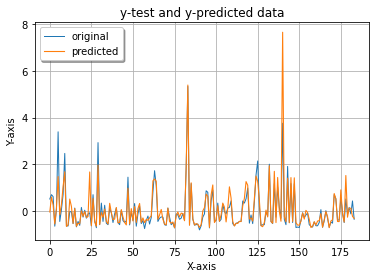

In [41]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

### PCA 

#### The first way

In [42]:
X

,Area,Room,Lon,Lat
0,-0.556246,-0.358391,0.363562,-0.298817
1,-0.625841,-0.358391,-0.716784,-0.613782
2,0.226691,0.269303,1.062372,-0.813635
3,0.557264,1.524692,-1.859166,-0.816548
4,0.731250,0.896997,0.264829,1.963513
...,...,...,...,...
914,0.365880,-1.613779,0.741306,-0.381354
915,-0.417058,-0.358391,0.040477,2.131957
916,-0.782428,-0.358391,-0.594920,-0.003488
917,0.296285,0.269303,1.457776,0.496229


In [43]:
cov_matrix = np.cov(np.transpose(X))
cov_matrix

array([[ 0.97930447,  0.78933276,  0.02235598,  0.01388244],
       [ 0.78933276,  0.97342284, -0.02619945, -0.02075343],
       [ 0.02235598, -0.02619945,  0.9991393 , -0.1827791 ],
       [ 0.01388244, -0.02075343, -0.1827791 ,  1.00217585]])

In [44]:
eigh_val, eigh_vec = np.linalg.eigh(cov_matrix)

print('Власні числа: ', eigh_val, '\n', sep='\n')
print('Власні вектори: ', eigh_vec, sep='\n')

Власні числа: 
[0.18424362 0.82057817 1.18348529 1.76573538]


Власні вектори: 
[[ 0.7041032   0.05021664 -0.00295008  0.70831368]
 [-0.70703172 -0.04251293  0.00671919  0.70587084]
 [-0.05132482  0.70761849 -0.70472512 -0.00208276]
 [-0.04135931  0.70352471  0.70944249 -0.00580889]]


In [45]:
print('Вклад кожного признаку (в %): ', [i/sum(eigh_val)*100 for i in eigh_val])

Вклад кожного признаку (в %):  [4.659626663469876, 20.752892187353392, 29.93102137247432, 44.65645977670242]


In [46]:
 eigh_vec[:, 2:]


array([[-0.00295008,  0.70831368],
       [ 0.00671919,  0.70587084],
       [-0.70472512, -0.00208276],
       [ 0.70944249, -0.00580889]])

In [47]:
X.dot(eigh_vec[:, 2:])

,0,1
0,-0.468972,-0.645996
1,0.069131,-0.691211
2,-1.324767,0.353175
3,0.739509,1.479569
4,1.210238,1.139162
...,...,...
914,-0.804888,-0.879291
915,1.482798,-0.560854
916,0.416680,-0.805923
917,-0.674350,0.394037


### The second way

In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents , columns = ['feature_1', 'feature_2'])
principalDf



,feature_1,feature_2
0,-0.638517,-0.466735
1,-0.683732,0.071368
2,0.360654,-1.322530
3,1.487048,0.741746
4,1.146641,1.212475
...,...,...
914,-0.871812,-0.802651
915,-0.553375,1.485036
916,-0.798444,0.418918
917,0.401517,-0.672113


In [49]:
final_data_frame = pd.concat([principalDf, y], axis = 1)
final_data_frame.dtypes

feature_1    float64
feature_2    float64
Price        float64
dtype: object

In [50]:
final_data_frame

,feature_1,feature_2,Price
0,-0.638517,-0.466735,0.116164
1,-0.683732,0.071368,-0.273293
2,0.360654,-1.322530,0.422166
3,1.487048,0.741746,-0.078564
4,1.146641,1.212475,0.181074
...,...,...,...
914,-0.871812,-0.802651,0.236710
915,-0.553375,1.485036,-0.505113
916,-0.798444,0.418918,-0.505113
917,0.401517,-0.672113,-0.043328


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


X_pca = final_data_frame[['feature_1', 'feature_2']]
y_pca = final_data_frame['Price']


X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size = 0.2, random_state = 0)


regressor_pca = RandomForestRegressor(n_estimators= 10, random_state = 0)
regressor_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = regressor_pca.predict(X_test_pca)
y_pred_pca

array([ 1.95910213e-01,  6.88730100e-02, -5.45912868e-01, -6.70168234e-01,
        7.98149005e-02,  3.97345879e+00,  4.94001542e-02, -2.06899720e-01,
        1.18018789e-01,  8.76532889e-01, -6.19167897e-01, -6.00622320e-01,
        9.27533226e-01,  1.77179180e-01, -5.70022118e-01,  2.74728915e-01,
       -6.55331772e-01, -5.96078654e-01, -5.71413036e-01, -7.76370484e-02,
       -4.71222782e-01, -2.50139736e-02, -8.87643946e-02, -2.59569159e-01,
        2.65827038e-01, -4.37421242e-01, -3.40984242e-01, -5.41044654e-01,
       -7.65307044e-01,  2.00280578e+00,  7.81457986e-02,  2.33928645e-01,
       -5.46840147e-01, -1.17510039e-01, -5.19021781e-01, -5.83931301e-01,
       -1.64366442e-02, -4.14731732e-02,  1.38233468e-01, -5.13643564e-01,
        3.44274829e-01, -4.41501269e-01, -5.52403820e-01, -2.52746146e-03,
       -8.41280003e-02, -5.37567358e-01, -5.30612767e-01,  7.32804667e-01,
       -6.04887803e-01,  2.59104266e-01, -5.51476541e-01, -8.91353061e-02,
       -4.92872518e-01,  

In [52]:
score = regressor_pca.score(X_train_pca, y_train_pca)
print("R-squared:", score) 

R-squared: 0.9451108204721391


In [53]:
score = regressor_pca.score(X_test_pca, y_pred_pca)
print("R-squared:", score) 

R-squared: 1.0


In [54]:
import sklearn
mse = sklearn.metrics.mean_squared_error(y_test_pca, y_pred_pca)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 

MSE:  0.268900916522271
RMSE:  0.1344504582611355


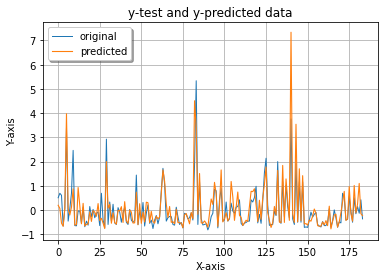

In [55]:
x_ax = range(len(y_test_pca))
plt.plot(x_ax, y_test_pca, linewidth=1, label="original")
plt.plot(x_ax, y_pred_pca, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

### Visualization

In [ ]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(4, 3, figsize=(18, 18))

fig.suptitle('Title')

sns.lineplot(ax=axes[0, 0], data=final_data_frame, x='Price', y='feature_1')
sns.lineplot(ax=axes[0, 1], data=final_data_frame, x='Price', y='feature_2')
sns.lineplot(ax=axes[0, 2], data=final_data_frame, x='feature_1', y='feature_2')
sns.scatterplot(ax=axes[1, 0], data=final_data_frame, x='Price', y='feature_1')
sns.scatterplot(ax=axes[1, 1], data=final_data_frame, x='Price', y='feature_2')
sns.scatterplot(ax=axes[1, 2], data=final_data_frame, x='feature_1', y='feature_2')
sns.regplot(ax=axes[2, 0], data=final_data_frame, x='Price', y='feature_1')
sns.regplot(ax=axes[2, 1], data=final_data_frame, x='Price', y='feature_2')
sns.regplot(ax=axes[2, 2], data=final_data_frame, x='feature_1', y='feature_2')
sns.barplot(ax=axes[3, 0], data=final_data_frame, x='Price', y='feature_1')
sns.barplot(ax=axes[3, 1], data=final_data_frame, x='Price', y='feature_2')
sns.barplot(ax=axes[3, 2], data=final_data_frame, x='feature_1', y='feature_2')

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(final_data_frame.corr(), annot = True)

### Pirson Correlation 

#### The first method

In [56]:
#With PCA
pirson_corr_feature_1 = np.corrcoef(X_pca['feature_1'], y_pca)
print('Pirson corr between feature_1 and price:\n', pirson_corr_feature_1)

pirson_corr_feature_2 = np.corrcoef(X_pca['feature_2'], y_pca)
print('Pirson corr between feature_2 and price:\n', pirson_corr_feature_2)

pirson_corr_feature_2 = np.corrcoef(X_pca['feature_2'], X_pca['feature_1'])
print('Pirson corr between feature_1 and feature_2:\n', pirson_corr_feature_2)

Pirson corr between feature_1 and price:
 [[1.         0.76714277]
 [0.76714277 1.        ]]
Pirson corr between feature_2 and price:
 [[1.        0.0499303]
 [0.0499303 1.       ]]
Pirson corr between feature_1 and feature_2:
 [[1.00000000e+00 3.14565545e-17]
 [3.14565545e-17 1.00000000e+00]]


In [57]:
#Without PCA
pirson_corr_feature_1 = np.corrcoef(prices_houses_standarted['Room'], prices_houses_standarted['Price'])
print('Pirson corr between feature_1 and price:\n', pirson_corr_feature_1)

pirson_corr_feature_2 = np.corrcoef(prices_houses_standarted['Area'], prices_houses_standarted['Price'])
print('Pirson corr between feature_2 and price:\n', pirson_corr_feature_2)

pirson_corr_feature_2 = np.corrcoef(prices_houses_standarted['Lon'], prices_houses_standarted['Price'])
print('Pirson corr between feature_1 and feature_2:\n', pirson_corr_feature_2)

pirson_corr_feature_2 = np.corrcoef(prices_houses_standarted['Lat'], prices_houses_standarted['Price'])
print('Pirson corr between feature_1 and feature_2:\n', pirson_corr_feature_2)

Pirson corr between feature_1 and price:
 [[1.         0.62371478]
 [0.62371478 1.        ]]
Pirson corr between feature_2 and price:
 [[1.         0.83508459]
 [0.83508459 1.        ]]
Pirson corr between feature_1 and feature_2:
 [[ 1.         -0.01227152]
 [-0.01227152  1.        ]]
Pirson corr between feature_1 and feature_2:
 [[1.         0.06192085]
 [0.06192085 1.        ]]


#### The second method

In [58]:
def covariance(xs, ys):
    dx = xs - xs.mean()
    dy = ys - ys.mean()
    return (dx * dy).sum()/(dx.count())

print('Covariance of feature_1:', covariance(X_pca['feature_1'], y_pca))
print('Covariance of feature_2:', covariance(X_pca['feature_2'], y_pca))

Covariance of feature_1: 1.018277567383531
Covariance of feature_2: 0.05425912043760393


In [59]:
def variance(xs):
    return sum((xs - xs.mean())**2)/xs.count()

print('Variance of feature_1:', variance(X_pca['feature_1']))
print('Variance of feature_2:', variance(X_pca['feature_2']))

Variance of feature_1: 1.7638140094457788
Variance of feature_2: 1.1821974934370767


In [60]:
def std(xs):
    return np.sqrt(variance(xs))

print('STD of feature_1:',std(X_pca['feature_1']))
print('STD of feature_1:',std(X_pca['feature_2']))

STD of feature_1: 1.3280865971184932
STD of feature_1: 1.0872890569839635


In [61]:
def corr(xs, ys):
    return covariance(xs, ys) / (std(xs) * std(ys))

In [62]:
#With PCA 

print('Corr between feature_1 and price:', corr(X_pca['feature_1'], y_pca))
print('Corr between feature_2 and price:', corr(X_pca['feature_2'], y_pca))

print('Corr between feature_1 and feature_1:', corr(X_pca['feature_1'], X_pca['feature_1']))
print('Corr between feature_2 and feature_2:', corr(X_pca['feature_2'], X_pca['feature_2']))

Corr between feature_1 and price: 0.7671427722018255
Corr between feature_2 and price: 0.04993029677153483
Corr between feature_1 and feature_1: 0.9999999999999993
Corr between feature_2 and feature_2: 1.0000000000000004


In [63]:
#Without PCA 

print('Corr between feature_1 and price:', corr(prices_houses_standarted['Area'], prices_houses_standarted['Price']))
print('Corr between feature_2 and price:', corr(prices_houses_standarted['Room'], prices_houses_standarted['Price']))
print('Corr between feature_1 and feature_1:', corr(prices_houses_standarted['Lon'], prices_houses_standarted['Price']))
print('Corr between feature_2 and feature_2:', corr(prices_houses_standarted['Lat'], prices_houses_standarted['Price']))

Corr between feature_1 and price: 0.8350845890252151
Corr between feature_2 and price: 0.6237147762340773
Corr between feature_1 and feature_1: -0.012271520141882658
Corr between feature_2 and feature_2: 0.06192085204566126


<AxesSubplot:>

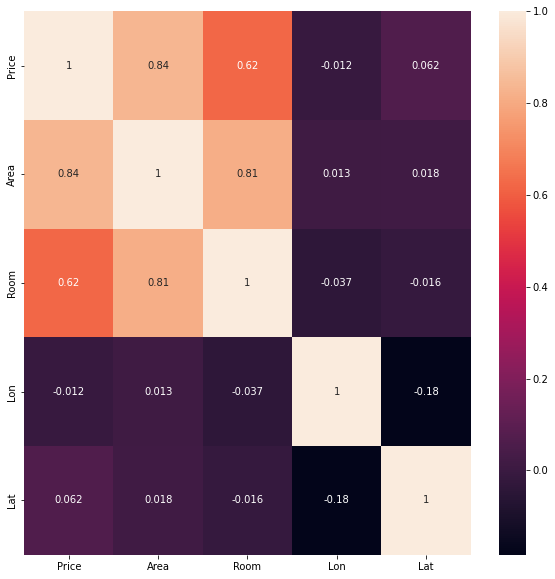

In [64]:
plt.figure(figsize=(10,10))
sns.heatmap(prices_houses_without_categorical_features.corr(), annot = True)

### The rule 68-95-99.7

In [65]:
for column in final_data_frame.columns:
    mean = final_data_frame[column].mean()
    sigma = final_data_frame[column].std()
    print(column)
    for i in range(1, 4):
        print('one SD, two SD, three SD:', final_data_frame[column].between(mean - i * sigma, mean + i * sigma).sum() / final_data_frame.shape[0])


feature_1
one SD, two SD, three SD: 0.8139281828073993
one SD, two SD, three SD: 0.9640914036996736
one SD, two SD, three SD: 0.9869423286180631
feature_2
one SD, two SD, three SD: 0.7910772578890098
one SD, two SD, three SD: 0.9281828073993471
one SD, two SD, three SD: 0.984766050054407
Price
one SD, two SD, three SD: 0.911860718171926
one SD, two SD, three SD: 0.9738846572361263
one SD, two SD, three SD: 0.9815016322089227


<AxesSubplot:>

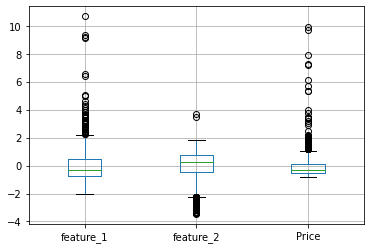

In [66]:
final_data_frame.boxplot()

In [67]:
final_data_frame

,feature_1,feature_2,Price
0,-0.638517,-0.466735,0.116164
1,-0.683732,0.071368,-0.273293
2,0.360654,-1.322530,0.422166
3,1.487048,0.741746,-0.078564
4,1.146641,1.212475,0.181074
...,...,...,...
914,-0.871812,-0.802651,0.236710
915,-0.553375,1.485036,-0.505113
916,-0.798444,0.418918,-0.505113
917,0.401517,-0.672113,-0.043328


In [68]:
def out_std(data_frame, column):
    global lower,upper
    data_mean, data_std = data_frame[column].mean(), data_frame[column].std()
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    data_frame_1 = data_frame[data_frame[column] > upper]
    data_frame_2 = data_frame[data_frame[column] < lower]
    print('Total number of outliers are', data_frame_1.shape[0]+ data_frame_2.shape[0])
    df = pd.concat([data_frame_1, data_frame_2])
    #return df

In [82]:
out_std(final_data_frame, 'Price')

The lower bound value is -1.3104629513953918
The upper bound value is 0.798025237067008
Total number of outliers are 0


In [83]:
out_std(final_data_frame, 'feature_1')

The lower bound value is -2.6787169201227288
The upper bound value is 1.9743913428786126
Total number of outliers are 0


In [84]:
out_std(final_data_frame, 'feature_2')

The lower bound value is -2.775712137876006
The upper bound value is 2.9868282990203436
Total number of outliers are 0


In [81]:
for column in final_data_frame.columns:
    mean = final_data_frame[column].mean()
    sigma = final_data_frame[column].std()
    final_data_frame = final_data_frame.loc[(final_data_frame[column].between(mean - 3 * sigma, mean + 3 * sigma))]

In [88]:
#final_data_frame = final_data_frame.reset_index()
final_data_frame = final_data_frame.drop(columns='index')

In [89]:
out_std(final_data_frame, 'Price')

The lower bound value is -1.3104629513953918
The upper bound value is 0.798025237067008
Total number of outliers are 0


In [90]:
out_std(final_data_frame, 'feature_1')

The lower bound value is -2.6787169201227288
The upper bound value is 1.9743913428786126
Total number of outliers are 0


In [91]:
out_std(final_data_frame, 'feature_2')

The lower bound value is -2.775712137876006
The upper bound value is 2.9868282990203436
Total number of outliers are 0


In [92]:
final_data_frame.reset_index(inplace=True)

In [298]:
final_data_frame = final_data_frame.drop(columns='index')
final_data_frame

,feature_1,feature_2,Price
0,-0.638517,-0.466735,0.116164
1,-0.683732,0.071368,-0.273293
2,0.360654,-1.322530,0.422166
3,1.487048,0.741746,-0.078564
4,1.146641,1.212475,0.181074
...,...,...,...
876,-0.871812,-0.802651,0.236710
877,-0.553375,1.485036,-0.505113
878,-0.798444,0.418918,-0.505113
879,0.401517,-0.672113,-0.043328


### Kolmogorov-Smirnov Test

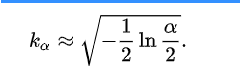

In [93]:
import scipy

def results(statistic, distribution = 'norm', alpha = 0.05):
    
    criteria = np.sqrt(-(1/2)*np.log(alpha / 2))
    print('criteria:', criteria)
    print('statistic:', statistic)
    
    if statistic < criteria:
        print(f'Hypothesis {distribution} accepted on α = {alpha}')
    else:
        print(f'Hypothesis {distribution} rejected on α = {alpha}')


In [94]:
for column in final_data_frame.columns:
    print('The result of Kolmogorov-Smirnov Test', column)
    results(scipy.stats.kstest(final_data_frame[column], 'norm').statistic)

The result of Kolmogorov-Smirnov Test index
criteria: 1.3581015157406195
statistic: 0.9947869816079078
Hypothesis norm accepted on α = 0.05
The result of Kolmogorov-Smirnov Test feature_1
criteria: 1.3581015157406195
statistic: 0.21632317737346085
Hypothesis norm accepted on α = 0.05
The result of Kolmogorov-Smirnov Test feature_2
criteria: 1.3581015157406195
statistic: 0.1354626183311899
Hypothesis norm accepted on α = 0.05
The result of Kolmogorov-Smirnov Test Price
criteria: 1.3581015157406195
statistic: 0.30804208011848067
Hypothesis norm accepted on α = 0.05


In [136]:
prices_houses_standarted = prices_houses_standarted.drop(columns='index')

### Models

In [157]:
y = prices_houses_standarted['Price']
X = prices_houses_standarted.drop('Price', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=44, shuffle =True)


In [158]:
y_pca = final_data_frame['Price']
X_pca = final_data_frame.drop('Price', axis = 1)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.30, random_state=44, shuffle =True)


### Linear Regression

### Without PCA

In [160]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linreg_model = LinearRegression().fit(X_train, y_train)
y_pred = linreg_model.predict(X_test)

print("Accuracy on Traing set: ",linreg_model.score(X_train,y_train))
print("Accuracy on Testing set: ",linreg_model.score(X_test,y_test))
print(r2_score(y_test, y_pred))

Accuracy on Traing set:  0.7011611025613773
Accuracy on Testing set:  0.7251390015112457
0.7251390015112457


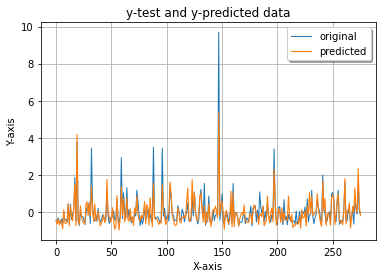

In [161]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

### With PCA

In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linreg_model = LinearRegression().fit(X_train_pca, y_train_pca)
y_pred_pca = linreg_model.predict(X_test_pca)

print("Accuracy on Traing set: ",linreg_model.score(X_train_pca,y_train_pca))
print("Accuracy on Testing set: ",linreg_model.score(X_test_pca,y_test_pca))
print(r2_score(y_test_pca, y_pred_pca))

Accuracy on Traing set:  0.32796278500403664
Accuracy on Testing set:  0.32932564681312765
0.3293256468131276


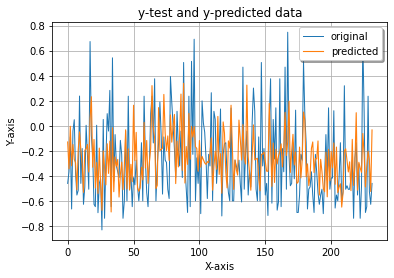

In [167]:
x_ax = range(len(y_test_pca))
plt.plot(x_ax, y_test_pca, linewidth=1, label="original")
plt.plot(x_ax, y_pred_pca, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

### Random Forest Regression

In [207]:
from sklearn.ensemble import RandomForestRegressor

rndf_model = RandomForestRegressor(n_estimators = 11).fit(X_train, y_train)
rndf_y_pred = rndf_model.predict(X_test)

print("Accuracy on Traing set: ",rndf_model.score(X_train,y_train))
print("Accuracy on Testing set: ",rndf_model.score(X_test,y_test))
print(r2_score(y_test, rndf_y_pred))

Accuracy on Traing set:  0.9419313996469311
Accuracy on Testing set:  0.778124374647843
0.778124374647843


In [208]:
from sklearn.ensemble import RandomForestRegressor

rndf_model = RandomForestRegressor(n_estimators = 11).fit(X_train_pca, y_train_pca)
rndf_y_pred_pca = rndf_model.predict(X_test_pca)

print("Accuracy on Traing set: ",rndf_model.score(X_train_pca,y_train_pca))
print("Accuracy on Testing set: ",rndf_model.score(X_test_pca,y_test_pca))
print(r2_score(y_test_pca, rndf_y_pred_pca))

Accuracy on Traing set:  0.9064742777746283
Accuracy on Testing set:  0.3870256499304029
0.3870256499304029


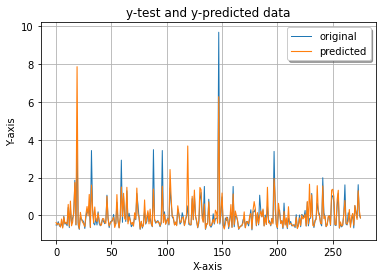

In [173]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, rndf_y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

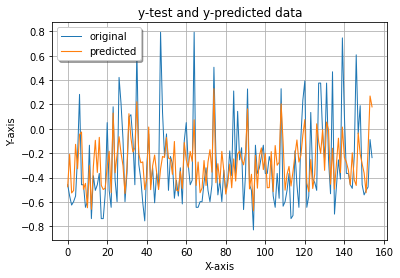

In [116]:
x_ax = range(len(y_test_pca))
plt.plot(x_ax, y_test_pca, linewidth=1, label="original")
plt.plot(x_ax, rndf_y_pred_pca, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

### KNeighbors Regression

In [209]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors = 7).fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)

print("Accuracy on Traing set: ",knn_model.score(X_train,y_train))
print("Accuracy on Testing set: ",knn_model.score(X_test,y_test))
print(r2_score(y_test, knn_y_pred))

Accuracy on Traing set:  0.8278146520695759
Accuracy on Testing set:  0.7655257672813716
0.7655257672813716


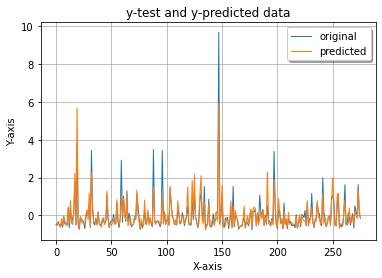

In [210]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, knn_y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [211]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors = 7).fit(X_train_pca, y_train_pca)
knn_y_pred_pca = knn_model.predict(X_test_pca)

print("Accuracy on Traing set: ",knn_model.score(X_train_pca,y_train_pca))
print("Accuracy on Testing set: ",knn_model.score(X_test_pca,y_test_pca))
print(r2_score(y_test_pca, knn_y_pred_pca))

Accuracy on Traing set:  0.6566956883386345
Accuracy on Testing set:  0.41801256171385026
0.41801256171385026


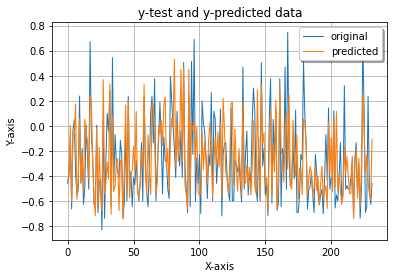

In [212]:
x_ax = range(len(y_test_pca))
plt.plot(x_ax, y_test_pca, linewidth=1, label="original")
plt.plot(x_ax, rndf_y_pred_pca, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

### RidgeRegression

In [182]:
from sklearn.linear_model import Ridge

ridge_regressor = Ridge()

ridge_regressor.fit(X_train, y_train)
y_pred_ridge = ridge_regressor.predict(X_test)

print("Accuracy on Traing set: ",ridge_regressor.score(X_train,y_train))
print("Accuracy on Testing set: ",ridge_regressor.score(X_test,y_test))
print(r2_score(y_test, y_pred_ridge))


Accuracy on Traing set:  0.7011540810163496
Accuracy on Testing set:  0.7249594744487028
0.7249594744487028


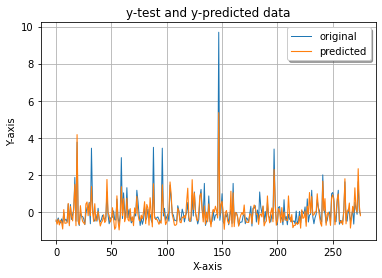

In [183]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred_ridge, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [180]:
from sklearn.linear_model import Ridge

ridge_regressor = Ridge()

ridge_regressor.fit(X_train_pca, y_train_pca)
y_pred_ridge_pca = ridge_regressor.predict(X_test_pca)

print("Accuracy on Traing set: ",ridge_regressor.score(X_train_pca,y_train_pca))
print("Accuracy on Testing set: ",ridge_regressor.score(X_test_pca,y_test_pca))
print(r2_score(y_test_pca, y_pred_ridge_pca))


Accuracy on Traing set:  0.32795976316047903
Accuracy on Testing set:  0.3293408381341816
0.3293408381341816


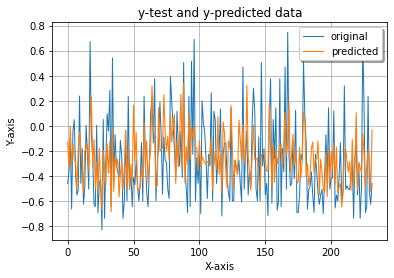

In [181]:
x_ax = range(len(y_test_pca))
plt.plot(x_ax, y_test_pca, linewidth=1, label="original")
plt.plot(x_ax, y_pred_ridge_pca, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

### SVM Regressor

In [215]:
from sklearn.svm import SVR 

svm_regressor = SVR()

svm_regressor.fit(X_train, y_train)
y_pred_svr = svm_regressor.predict(X_test)

print("Accuracy on Traing set: ",svm_regressor.score(X_train,y_train))
print("Accuracy on Testing set: ",svm_regressor.score(X_test,y_test))
print(r2_score(y_test, y_pred_svr))


Accuracy on Traing set:  0.7183049322413497
Accuracy on Testing set:  0.6459915579733225
0.6459915579733225


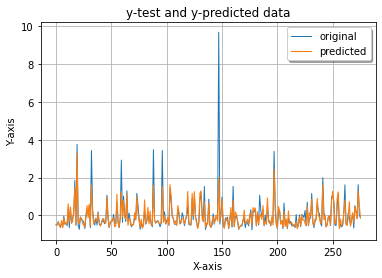

In [185]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred_svr, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [214]:
from sklearn.svm import SVR 

svm_regressor = SVR()

svm_regressor.fit(X_train_pca, y_train_pca)
y_pred_svr_pca = svm_regressor.predict(X_test_pca)

print("Accuracy on Traing set: ",svm_regressor.score(X_train_pca,y_train_pca))
print("Accuracy on Testing set: ",svm_regressor.score(X_test_pca,y_test_pca))
print(r2_score(y_test_pca, y_pred_svr_pca))


Accuracy on Traing set:  0.5829102310488831
Accuracy on Testing set:  0.5061408290945507
0.5061408290945507


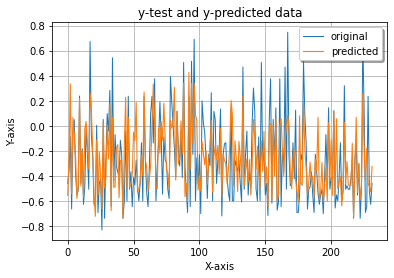

In [188]:
x_ax = range(len(y_test_pca))
plt.plot(x_ax, y_test_pca, linewidth=1, label="original")
plt.plot(x_ax, y_pred_svr_pca, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

### Ensemble for Regression

In [233]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import VotingRegressor
 

def get_models():
    models = list()
    models.append(('RandomForestRegressor', RandomForestRegressor()))
    models.append(('KNN', KNeighborsRegressor()))
    models.append(('Linear', LinearRegression()))
    return models

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)
models = get_models()
scores = [0.78, 0.77, 0.73]
ensemble = VotingRegressor(estimators=models, weights=scores)
ensemble.fit(X_train, y_train)
yhat = ensemble.predict(X_test)
score = r2_score(y_test, yhat)
print('Weighted Avg r2_score: %.3f' % (score))

# ensemble = VotingRegressor(estimators=models)
# ensemble.fit(X_train, y_train)
# yhat = ensemble.predict(X_test)
# score = r2_score(y_test, yhat)
print("Accuracy on Traing set: ",ensemble.score(X_train,y_train))
print("Accuracy on Testing set: ",ensemble.score(X_test,y_test))
print(r2_score(y_test, yhat))


Weighted Avg r2_score: 0.732
Accuracy on Traing set:  0.8903258668678412
Accuracy on Testing set:  0.7318217621494599
0.7318217621494599


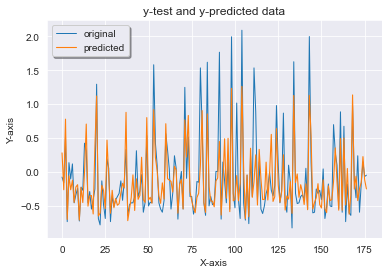

In [545]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, yhat, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [263]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import VotingRegressor
 

def get_models_pca():
    models.append(('KNN_pca', KNeighborsRegressor()))
    models.append(('SVR_pca', SVR()))
    return models

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca,y_pca, test_size=0.2, random_state=1)
models_pca = get_models_pca()
scores = [0.42, 0.50]
ensemble_pca = VotingRegressor(estimators=models_pca, weights=scores)
ensemble_pca.fit(X_train_pca, y_train_pca)
yhat_pca = ensemble_pca.predict(X_test_pca)
score = r2_score(y_test_pca, yhat_pca)
print('Weighted Avg r2_score: %.3f' % (score))

print("Accuracy on Traing set: ",ensemble_pca.score(X_train_pca,y_train_pca))
print("Accuracy on Testing set: ",ensemble_pca.score(X_test_pca,y_test_pca))
print(r2_score(y_test_pca, yhat_pca))



Weighted Avg r2_score: 0.598
Accuracy on Traing set:  0.6220804754248608
Accuracy on Testing set:  0.5983356304188805
0.5983356304188805


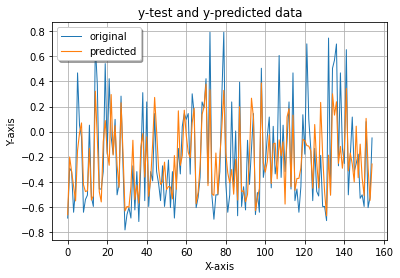

In [264]:
x_ax = range(len(y_test_pca))
plt.plot(x_ax, y_test_pca, linewidth=1, label="original")
plt.plot(x_ax, yhat_pca, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 